In [25]:
import numpy as np 
import matplotlib.pyplot as plt 

In [26]:
n = 10
many_lam = []

In [27]:
for i in range(1, n + 1):
    many_lam.append(np.random.randint(10 * (i - 1), 10 * i))
many_lam += np.random.sample(n)

In [28]:
def create_matrix_with_eignvalues(eignvalues, n):
    random_matrix = np.random.rand(n, n)
    Q, _ = np.linalg.qr(random_matrix)
    D = np.diag(eignvalues)
    A = Q.T @ D @ Q
    return A
A = create_matrix_with_eignvalues(many_lam, n)
T = np.copy(A)
K = np.triu(T, 1)
K = np.abs(K)
K.max(), K

(np.float64(17.208216779847216),
 array([[0.00000000e+00, 7.95703885e-02, 1.41283725e+01, 4.93873154e+00,
         2.31505189e+00, 1.72082168e+01, 1.16123719e+01, 5.13596130e+00,
         7.28466682e+00, 1.39431336e+01],
        [0.00000000e+00, 0.00000000e+00, 1.23196716e+01, 4.50600165e+00,
         1.06818422e+01, 1.48527396e+01, 5.26504916e+00, 1.27226061e+01,
         6.33269889e+00, 2.16463012e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.82956060e+00,
         7.64534795e+00, 1.98683629e-02, 1.06835689e+01, 1.06500729e+01,
         1.94390734e-01, 2.31837011e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         1.75806019e+00, 1.71696786e+00, 1.65379692e+01, 5.79494125e+00,
         3.16916248e+00, 1.22407939e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 7.24441670e+00, 1.10358381e+01, 9.16077828e+00,
         1.38548360e+01, 7.95707673e+00],
        [0.00000000e+00, 0.

In [32]:
def jacobi_method(A, eps, n):    
    eigenvectors = np.eye(n)
    T = np.copy(A)
    K = np.triu(T, 1)
    K = np.abs(K)
    it = 0
    while K.max() ** 2 > eps:
        it += 1
        G = np.eye(n)
        F = np.triu(T,1)
        p, q = np.unravel_index(np.argmax(np.abs(F)), F.shape)
        
        C = np.sqrt(1 / (1 + (2 * T[p, q] / (T[p, p] - T[q, q])) ** 2))
        s = np.sqrt((1 - C) / 2)
        c = np.sqrt((1 + C) / 2)

        for i in range(n):
            t = T[i, p]
            g = eigenvectors[i, p]
            T[i, p] = c * t - s * T[i, q]
            T[i, q] = s * t + c * T[i, q]
            eigenvectors[i, p] = np.round(c * g - s * eigenvectors[i, q], 4)
            eigenvectors[i, q] = np.round(s * g + c * eigenvectors[i, q], 4)
    
        for j in range(n):
            t = T[p, j]
            g = eigenvectors[p, j]
            T[p, j] = c * t - s * T[q, j]
            T[q, j] = s * t + c * T[q, j]
        
        G[p, p] = c
        G[p, q] = s
        G[q, p] = -s
        G[q, q] = c
     
        #eigenvectors =  np.dot(eigenvectors, G)
        K = np.triu(T, 1)
        K = np.abs(K)
    eigenvalues = np.diag(T)
    return [eigenvalues, eigenvectors, it]

In [30]:
x = [0.1,0.001,0.0001,0.00001,0.000001,0.0000001,0.00000001,0.000000001,0.0000000001]
many_errors = []
many_nevazka = []
many_it = []
for i in range(len(x)):
    num_eignvalue = jacobi_method(A, x[i], n)[0][0]
    num_eignvector = jacobi_method(A, x[i], n)[1][:,0]
    for j in range(n):
        if np.round(num_eignvalue) == np.round(many_lam[j]):
            eignvalue = many_lam[j]
    num_eignvector = jacobi_method(A, x[i], n)[1][:,0]
    many_errors.append(abs(eignvalue - num_eignvalue))
    many_nevazka.append(np.linalg.norm(np.dot(A, num_eignvector) - np.dot(num_eignvalue, num_eignvector), 2))
for i in range(len(x)):
    many_it.append(jacobi_method(A, x[i], n)[2])

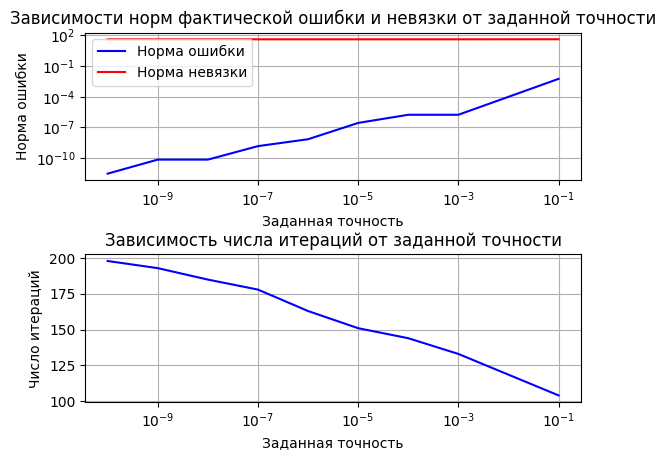

In [ ]:
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

plt.subplot(2,1,1)
plt.loglog(x, many_errors, color = 'blue', label = 'Норма ошибки')
plt.loglog(x, many_nevazka, color = 'red', label = 'Норма невязки')
plt.title('Зависимости норм фактической ошибки и невязки от заданной точности')
plt.xlabel('Заданная точность')
plt.ylabel('Норма ошибки')
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(x, many_it, color = 'blue')
plt.title('Зависимость числа итераций от заданной точности')
plt.xscale('log')
plt.xlabel('Заданная точность')
plt.ylabel('Число итераций')
plt.grid(True)